In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import numpy as np
import time
import math
import os
import pickle

from model import coarseNet, fineNet
from train import train_coarse, get_file_name, plot_losses

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Load TensorDataset
with open('depth_estimation_coarse.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [4]:
# # change rgb from 0-255 to 0-1
# image_list = []
# depth_map_pooled_list = []
# # depth_map_list = []
# for i in range(len(dataset)):
#     image_list.append(dataset[i][0]/255)
#     depth_map_pooled_list.append(dataset[i][1])
#     # depth_map_list.append(dataset[i][2])

# image_tensor = torch.stack(image_list)
# depth_map_pooled_tensor = torch.stack(depth_map_pooled_list)
# # depth_map_tensor = torch.stack(depth_map_list)

# new_dataset = TensorDataset(image_tensor, depth_map_pooled_tensor)

# # Store TensorDataset
# with open('depth_estimation_coarse.pkl', 'wb') as f:
#     pickle.dump(new_dataset, f)

In [5]:
print(len(dataset))

# split the dataset to train, val, and test sets
num_examples = len(dataset)
indices = list(range(num_examples))
np.random.shuffle(indices)

# 10% of test data and another 20% of val data
test_index = np.floor(0.1 * num_examples)
val_index = np.floor(0.25 * num_examples)
test_index = int(test_index)
val_index = int(val_index)

# get indices for samplers
test_idx, val_idx, train_idx \
= indices[0:test_index], indices[test_index:val_index], indices[val_index:]

# check if indices match with each other
print(f'Total num of examples: {len(dataset)},'
        f' num of test: {len(test_idx)},'
        f' num of val: {len(val_idx)},'
        f' num of train: {len(train_idx)}')
assert (len(test_idx) + len(val_idx) + len(train_idx)) == len(dataset)

# generate 3 datasets
train_set = torch.utils.data.Subset(dataset, train_idx)
val_set = torch.utils.data.Subset(dataset, val_idx)
test_set = torch.utils.data.Subset(dataset, test_idx)

train_loader = DataLoader(dataset=train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(dataset=val_set, batch_size=4, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=4, shuffle=True)

2000
Total num of examples: 2000, num of test: 200, num of val: 300, num of train: 1500


In [6]:
single_batch = next(iter(train_loader))
print(single_batch[0].shape)
print(single_batch[1].shape)
print(single_batch[0].dtype)
print(single_batch[1].dtype)

torch.Size([4, 3, 240, 320])
torch.Size([4, 60, 80])
torch.float32
torch.float32


In [8]:
coarse_net = coarseNet()
coarse_net.cuda()

train_coarse(coarse_net, train_loader, val_loader, 10, 0.0001, 4, "FirstTry")

Start training: 


/home/spencer/miniconda3/envs/aps360/lib/python3.8/site-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1: Average training loss is 165.74443032900493 Eval loss is 104.85085678100586
Time elapsed: 21.11 seconds
Epoch 2: Average training loss is 102.81115552139282 Eval loss is 101.08018829345703
Time elapsed: 40.54 seconds
Epoch 3: Average training loss is 110.96304574839274 Eval loss is 105.46966367085774
Time elapsed: 60.04 seconds
Epoch 4: Average training loss is 97.0255703239441 Eval loss is 98.05179834365845
Time elapsed: 79.61 seconds
Epoch 5: Average training loss is 97.59826160176596 Eval loss is 100.06491230010987
Time elapsed: 99.08 seconds
Epoch 6: Average training loss is 98.97374381001791 Eval loss is 96.5218746693929
Time elapsed: 118.64 seconds
Epoch 7: Average training loss is 109.27407867685953 Eval loss is 83.69784590403239
Time elapsed: 137.67 seconds
Epoch 8: Average training loss is 105.42724405924479 Eval loss is 95.30709653218587
Time elapsed: 154.86 seconds
Epoch 9: Average training loss is 93.87642338816325 Eval loss is 103.75844694773356
Time elapsed: 173.

FirstTry_coarseNet_4_10_0.0001


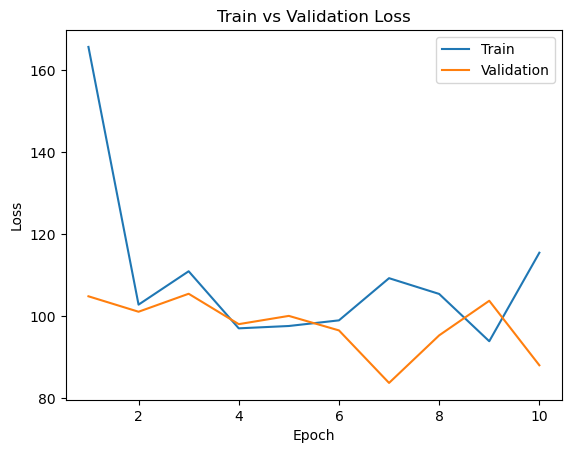

In [15]:
root_path = "/home/spencer/course_repos/APS360-AwareAI/logs/"
file_name = get_file_name("FirstTry", coarse_net.name, 10, 0.0001, 4)
print(file_name)
plot_losses(root_path + "FirstTry_coarseNet_0.0001_10_4")